https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

import argparse
import os
import random

from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
from torch import optim
from torch.autograd import Variable

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [6]:
root_path = "../data"
train_data = datasets.MNIST(
    root = root_path,
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = root_path, 
    train = False, 
    transform = ToTensor()
)

In [10]:
# Root directory for dataset
"data/MNIST"


# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 28

# Number of channels in the training images. For color images this is 3
nc = 1

# Size of z latent vector (i.e. size of generator input)
nz = 10

# Size of feature maps in generator
ngf = 32

# Size of feature maps in discriminator
ndf = 32

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [16]:
dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

In [32]:
len(real_batch[0])

128

device cuda:0


<Figure size 576x576 with 0 Axes>

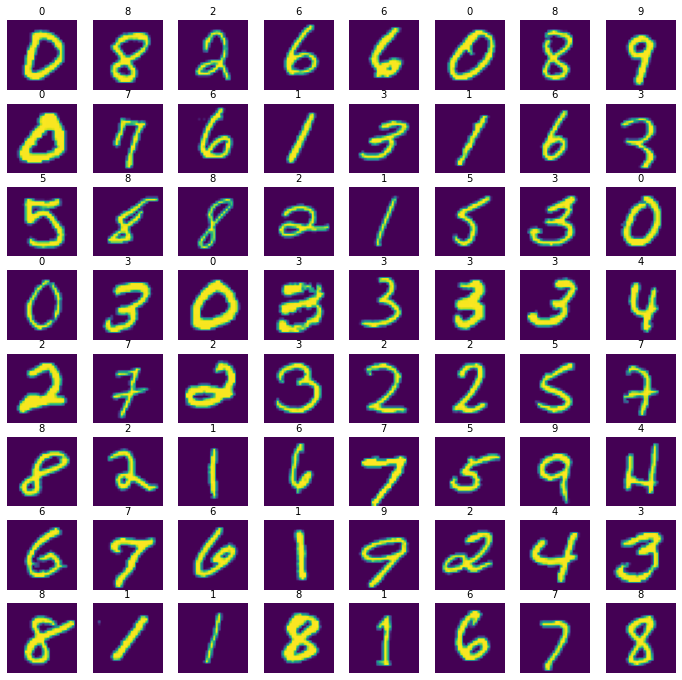

In [36]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print("device", device)

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))


fig, axarr = plt.subplots(nrows=8, ncols=8, figsize=(12, 12))
faxarr = axarr.flatten()

for i in np.arange(64):

    im = real_batch[0][i]
    label = real_batch[1][i]
    faxarr[i].imshow(im.numpy()[0, :, :])
    faxarr[i].set_title(label.numpy(), fontsize=10)
    faxarr[i].axis("off")